In [1]:
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

In [2]:
from pathlib import Path
csvpath = Path("../Project 2/Resources/DOGE_USD.csv")
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-01-01,DOGE,0.005405,0.004665,0.005516,0.004621
2021-01-02,DOGE,0.011427,0.005681,0.013892,0.005550
2021-01-03,DOGE,0.010046,0.010450,0.013907,0.009240
2021-01-04,DOGE,0.009630,0.009694,0.011450,0.007654
2021-01-05,DOGE,0.009730,0.009779,0.010279,0.008835


In [3]:
test = df['Closing Price (USD)']

from statsmodels.tsa.stattools import adfuller

print("p-value:", adfuller(test.dropna()))

p-value: (-1.507909853353111, 0.5295948817632559, 7, 196, {'1%': -3.464161278384219, '5%': -2.876401960790147, '10%': -2.5746921001665974}, -750.1993387990653)


In [4]:
test

Date
2021-01-01    0.005405
2021-01-02    0.011427
2021-01-03    0.010046
2021-01-04    0.009630
2021-01-05    0.009730
                ...   
2021-07-19    0.175495
2021-07-20    0.169323
2021-07-21    0.190550
2021-07-22    0.190272
2021-07-23    0.192075
Name: Closing Price (USD), Length: 204, dtype: float64

<AxesSubplot:xlabel='Date'>

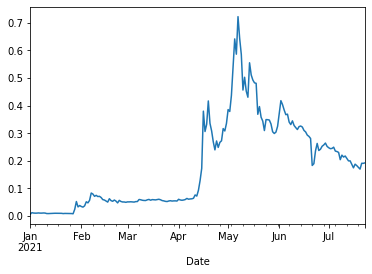

In [5]:
df["Closing Price (USD)"].plot()

<AxesSubplot:xlabel='Date'>

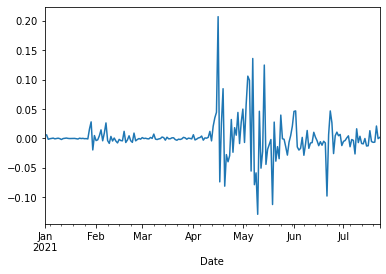

In [6]:
# Differencing the Settle price stationarizes the time series
df["Closing Price (USD)"].diff().plot()

# Autocorrelation and Partial Autocorrelation Analysis

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

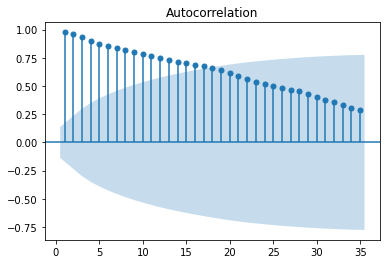

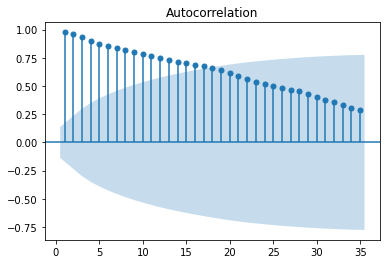

In [8]:
# Plot the autocorrelation of the Settle Prices
plot_acf(df["Closing Price (USD)"], zero=False, lags=35)

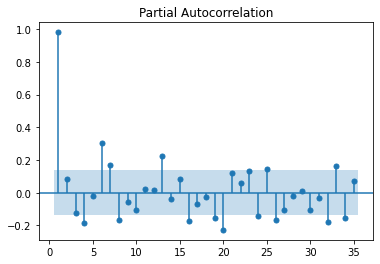

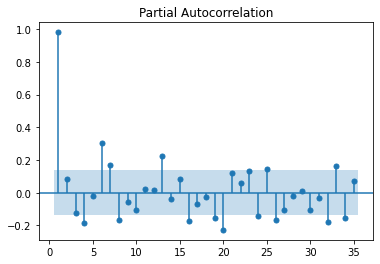

In [9]:
# Plot the partial autocorrelation of the returns
plot_pacf(df["Closing Price (USD)"], zero=False, lags=35)

# ARIMA Model

In [10]:
from statsmodels.tsa.arima_model import ARIMA

In [11]:
# Create an ARIMA model
model = ARIMA(df["Closing Price (USD)"].values, order=(2, 2, 1))

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [12]:
# Fit the model to the data
results = model.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [13]:
# Print the model summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                   D2.y   No. Observations:                  202
Model:                 ARIMA(2, 2, 1)   Log Likelihood                 402.296
Method:                       css-mle   S.D. of innovations              0.033
Date:                Sat, 31 Jul 2021   AIC                           -794.592
Time:                        10:26:04   BIC                           -778.051
Sample:                             2   HQIC                          -787.899
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.405e-05   4.02e-05     -0.598      0.550      -0.000    5.48e-05
ar.L1.D2.y    -0.0692      0.070     -0.988      0.323      -0.206       0.068
ar.L2.D2.y     0.1002      0.070      1.434      0.152      -0.037       0.237
ma.L1.D2.y    -1.0000      0.016    -63.965      0.000      -1.031      -0.969
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.8322           +0.0000j            2.8322            0.5000
AR.2            3.5227           +0.0000j            3.5227            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

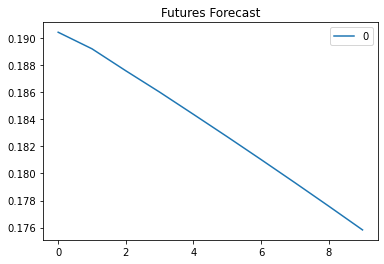

In [14]:
# Plot the Futures Price Forecast
pd.DataFrame(results.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [15]:
# save model
results.save('doge_model1.pkl')

# ARIMA Model using a Lag of 2

In [16]:
# Create an ARIMA Model and fit it to the data
model2 = ARIMA(df["Closing Price (USD)"].values, order=(3, 1, 0))
results2 = model2.fit()

C:\Users\Jamison\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [17]:
# print the model summary
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  203
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 409.483
Method:                       css-mle   S.D. of innovations              0.032
Date:                Sat, 31 Jul 2021   AIC                           -808.965
Time:                        10:26:04   BIC                           -792.399
Sample:                             1   HQIC                          -802.263
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0009      0.003      0.346      0.729      -0.004       0.006
ar.L1.D.y     -0.0870      0.069     -1.257      0.209      -0.223       0.049
ar.L2.D.y      0.1075      0.069      1.561      0.119      -0.028       0.243
ar.L3.D.y      0.1465      0.069      2.125      0.034       0.011       0.282
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.7726           -0.0000j            1.7726           -0.0000
AR.2           -1.2532           -1.5096j            1.9620           -0.3603
AR.3           -1.2532           +1.5096j            1.9620            0.3603
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'Futures Forecast'}>

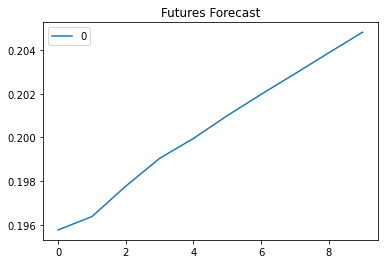

In [18]:
# Plot the Futures Price Forecast
pd.DataFrame(results2.forecast(steps=10)[0]).plot(title="Futures Forecast")

In [19]:
# save model
results2.save('doge_model2.pkl')